In [52]:
## Get dependencies ##

import numpy as np
import string
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
import pickle
import time
import scipy as sp
from scipy import signal
from scipy.io.idl import readsav
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import glob
import requests
import ftplib
import io
import cmocean
from bs4 import BeautifulSoup
import urllib.request
from io import StringIO, BytesIO
from zipfile import ZipFile
import tqdm
import seaborn as sn
import re
    
## Pandas options setup

pd.set_option('display.max_columns', 100)
    
## Matplotlib rcparams setup:

matplotlib.rcParams['font.family']='Helvetica'
matplotlib.rcParams['font.size']=11
# matplotlib.rcParams['font.weight']=400

matplotlib.rcParams['image.cmap']='cmo.ice'

matplotlib.rcParams['axes.prop_cycle']=matplotlib.cycler('color',['011936','FF7D00','225560','BFACAA','D72638','788C9B','A33F00','7CAAB0','685655','EB767C'])
matplotlib.rcParams['axes.formatter.limits']=-3,3
# matplotlib.rcParams['axes.labelweight']=300

matplotlib.rcParams['legend.frameon']=False

matplotlib.rcParams['boxplot.whiskers']=(5,95)
matplotlib.rcParams['boxplot.showfliers']=False
matplotlib.rcParams['boxplot.showfliers']=False
matplotlib.rcParams['boxplot.medianprops.color']='black'

matplotlib.rcParams['errorbar.capsize']=5

matplotlib.rcParams['hist.bins']='auto'

plt.rcParams['pdf.fonttype'] = 42

%matplotlib inline

%load_ext line_profiler
%load_ext memory_profiler

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV,LeaveOneOut
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from KDEpy import FFTKDE
import statsmodels.api as sm

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


CPU times: user 480 µs, sys: 0 ns, total: 480 µs
Wall time: 331 µs
CPU times: user 27 µs, sys: 0 ns, total: 27 µs
Wall time: 28.8 µs
CPU times: user 365 µs, sys: 0 ns, total: 365 µs
Wall time: 296 µs
CPU times: user 7.79 s, sys: 0 ns, total: 7.79 s
Wall time: 7.79 s


/home/leachl/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


CPU times: user 207 ms, sys: 0 ns, total: 207 ms
Wall time: 206 ms


/home/leachl/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


CPU times: user 630 ms, sys: 0 ns, total: 630 ms
Wall time: 629 ms
CPU times: user 934 ms, sys: 0 ns, total: 934 ms
Wall time: 934 ms


[Text(0.5, 1.0, 'data'),
 Text(0.5, 1.0, '2d hist'),
 Text(0.5, 1.0, 'scipy'),
 Text(0.5, 1.0, 'scikit-learn'),
 Text(0.5, 1.0, 'statsmodels')]

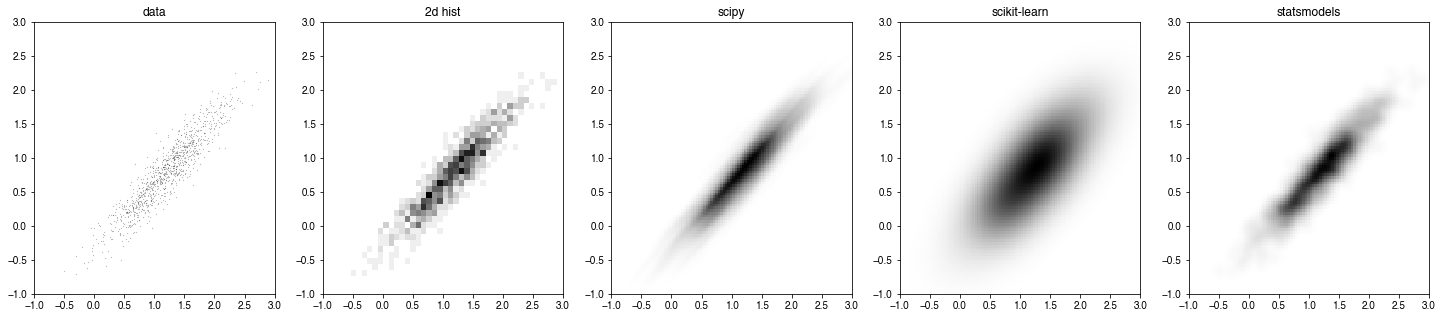

In [114]:
n = 1000

N1 = np.random.normal(1,0.5,n)
N2 = np.random.normal(0.2,0.1,n)

bw_scott = n**(-1./(2+4))

x = N1+N2
y = N1-N2

# scipy
%time sp_kde = sp.stats.gaussian_kde(np.vstack([x,y]),bw_method=bw_scott)

# scikit-learn
%time skl_kde = KernelDensity(bandwidth=bw_scott, metric='euclidean', kernel='gaussian', algorithm='ball_tree')
%time skl_kde.fit(np.vstack([x,y]).T)

# statsmodels
%time sm_kde = sm.nonparametric.KDEMultivariate(np.vstack([x,y]),var_type='cc',bw='cv_ls')

X, Y = np.mgrid[-1:3:100j, -1:3:100j]

fig,ax = plt.subplots(1,5,figsize=(25,5))

ax[0].scatter(x,y,c='k',s=0.01)
ax[1].hist2d(x,y,bins=40,cmap='binary',zorder=0)
%time ax[2].pcolormesh(X,Y,np.reshape(sp_kde(np.vstack([X.ravel(),Y.ravel()])).T,X.shape),cmap='binary')
%time ax[3].pcolormesh(X,Y,np.reshape(np.exp(skl_kde.score_samples(np.vstack([X.ravel(),Y.ravel()]).T)), X.shape),cmap='binary')
%time ax[4].pcolormesh(X,Y,np.reshape(sm_kde.pdf(np.vstack([X.ravel(),Y.ravel()])), X.shape),cmap='binary')

[a.set_xlim(-1,3) for a in ax]
[a.set_ylim(-1,3) for a in ax]

[ax[i].set_title(x) for i,x in enumerate(['data','2d hist','scipy','scikit-learn','statsmodels'])]

## SCIPY is the way to go